In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import os
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
df = pd.read_csv('../CSV/AllDecks.csv')
df = df.drop(['artists', 'names','deck_color'], axis=1)
#Eliminamos las columnas redundantes que se usaron en el modelo observado
data, labels_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df

,code,mainBoard,meta,name,releaseDate,sideBoard,type,edhrecRank_mean,convertedManaCost_mean,total_price
0,KTK,"[{'artist': 'Zack Stella', 'borderColor': 'bla...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Abzan Siege,2014-09-26,[],Intro Pack,6314.428571,2.709677,0.68
1,C18,"[{'artist': 'Winona Nelson', 'borderColor': 'b...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Adaptive Enchantment,2018-08-10,"[{'artist': 'Johannes Voss', 'borderColor': 'b...",Commander Deck,2145.052632,2.962025,0.00
2,BTD,"[{'artist': 'Doug Chaffee', 'borderColor': 'wh...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Aerodoom,2000-10-01,[],Theme Deck,10516.052632,3.048780,0.00
3,WTH,"[{'artist': 'Douglas Shuler', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Forces,2007-12-12,[],MTGO Theme Deck,8699.772727,2.833333,2.63
4,JUD,"[{'artist': 'Ron Spears', 'borderColor': 'blac...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Razers,2002-05-27,[],Theme Deck,11014.800000,3.086957,0.68
...,...,...,...,...,...,...,...,...,...,...
630,RQS,"[{'artist': 'Christopher Rush', 'borderColor':...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zakk's Second Deck,1996-06-10,[],Intro Pack,12554.071429,1.764706,0.00
631,BFZ,"[{'artist': 'Daniel Ljunggren', 'borderColor':...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zendikar's Rage,2015-10-02,[],Intro Pack,7534.821429,2.533333,0.83
632,DDP,"[{'artist': 'Zoltan Boros & Gabor Szikszai', '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zendikar,2015-08-28,[],Duel Deck,6791.941176,2.527778,0.00
633,HOP,"[{'artist': 'Thomas M. Baxa', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zombie Empire,2009-09-04,"[{'artist': 'Jason A. Engle', 'borderColor': '...",Planechase Deck,4364.645161,3.187500,32.47


In [25]:
df_dummies = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies)

kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(scaled_data)

# Asignar las etiquetas de los clusters al dataframe original con dummies
df_dummies['Cluster'] = kmeans.labels_
#Visualizamos los datos resultantes
print(df_dummies)

     edhrecRank_mean  convertedManaCost_mean  total_price  code_5DN  code_7ED  \
0        6314.428571                2.709677         0.68     False     False   
1        2145.052632                2.962025         0.00     False     False   
2       10516.052632                3.048780         0.00     False     False   
3        8699.772727                2.833333         2.63     False     False   
4       11014.800000                3.086957         0.68     False     False   
..               ...                     ...          ...       ...       ...   
630     12554.071429                1.764706         0.00     False     False   
631      7534.821429                2.533333         0.83     False     False   
632      6791.941176                2.527778         0.00     False     False   
633      4364.645161                3.187500        32.47     False     False   
634      8983.090909                3.173913         0.72     False     False   

     code_8ED  code_9ED  co

C:\Users\Corre\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


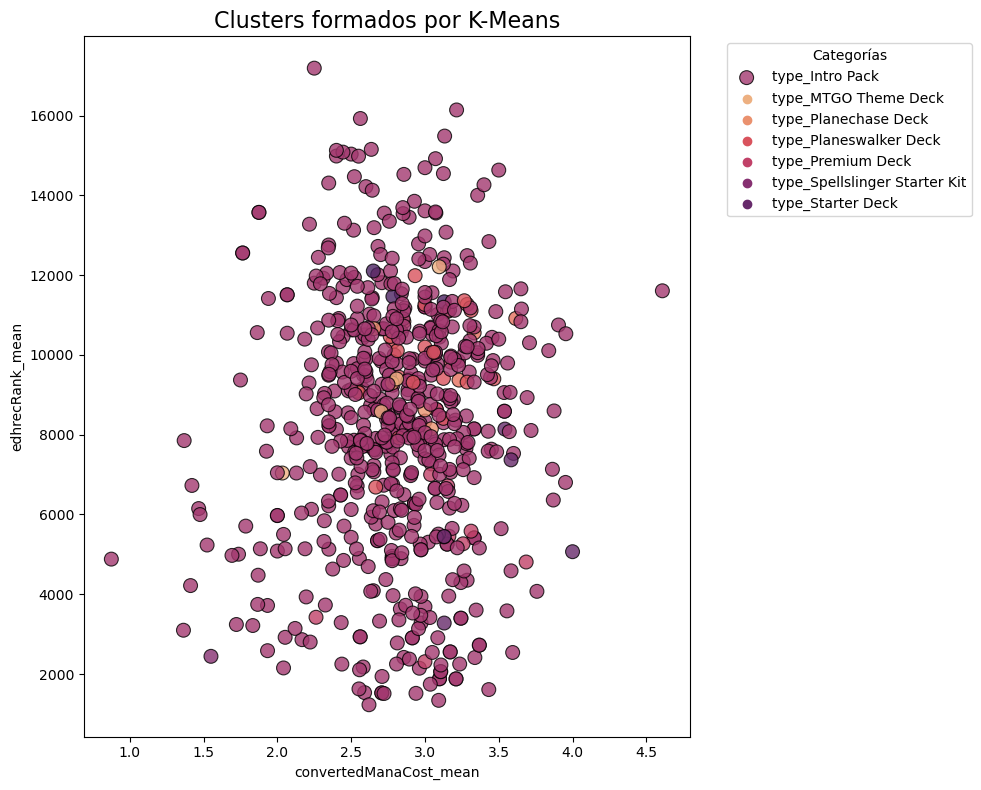

In [27]:
plt.figure(figsize=(10, 8))

# Crear una lista de categorías para mapear colores en la leyenda y gráfica
categorias = [
    'type_Intro Pack', 'type_MTGO Theme Deck', 'type_Planechase Deck', 'type_Planeswalker Deck',
    'type_Premium Deck', 'type_Spellslinger Starter Kit', 'type_Starter Deck', 'type_Theme Deck', 
    'type_Welcome Deck'
]

# Graficar los clusters con los colores de las categorías
sns.scatterplot(x='convertedManaCost_mean', y='edhrecRank_mean', hue='Cluster', data=df_dummies, 
                palette='flare', s=100, alpha=0.8, edgecolor='black')

# Asignar título y leyenda
plt.title('Clusters formados por K-Means', fontsize=16)
plt.legend(title='Categorías', labels=categorias, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()